# Food Delivery Time Data Analysis <hr style="border:2.5px solid"></hr>

Name: **Patrick Rhy Anda** <br>
Section: **CPE2A**

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning of Database

In [144]:
df = pd.read_csv(r"raw\Food_Time new.csv", delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Traffic_Level                9085 non-null   object 
 1   ID                           10000 non-null  object 
 2   Delivery_person_ID           10000 non-null  object 
 3   weather_description          9995 non-null   object 
 4   Type_of_order                10000 non-null  object 
 5   Type_of_vehicle              10000 non-null  object 
 6   Delivery_person_Age          10000 non-null  int64  
 7   Delivery_person_Ratings      10000 non-null  float64
 8   Restaurant_latitude          10000 non-null  object 
 9   Restaurant_longitude         10000 non-null  object 
 10  Delivery_location_latitude   10000 non-null  object 
 11  Delivery_location_longitude  10000 non-null  object 
 12  temperature                  9995 non-null   float64
 13  humidity         

In [145]:
df.head()

,Traffic_Level,ID,Delivery_person_ID,weather_description,Type_of_order,Type_of_vehicle,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,temperature,humidity,precipitation,Distance (km),TARGET
0,High,70A2,CHENRES12DEL01,mist,Snack,scooter,32,4.6,12.972.793,80.249.982,13.012.793,80.289.982,26.55,87.0,0.0,9.89,43.45
1,High,95B4,RANCHIRES15DEL01,clear sky,Meal,scooter,33,4.7,23.369.746,8.533.982,23.479.746,8.544.982,17.51,69.0,0.0,19.11,3.816.666.667
2,High,CDCD,DEHRES17DEL01,clear sky,Snack,motorcycle,36,4.2,30.327.968,78.046.106,30.397.968,78.116.106,12.44,77.0,0.0,11.59,3.636.666.667
3,High,2784,PUNERES13DEL03,clear sky,Drinks,scooter,23,4.7,1.856.245,73.916.619,1.865.245,74.006.619,19.37,65.0,0.0,21.93,49.45
4,High,6F67,HYDRES14DEL01,overcast clouds,Snack,motorcycle,34,4.9,17.426.228,78.407.495,17.496.228,78.477.495,21.29,64.0,0.0,18.26,5.248.333.333


In [146]:
df_d = df.copy()
df_d = df_d.drop(columns=['Delivery_person_ID','Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'], axis=1)
df_d = df_d.rename(columns={'weather_description':'Weather', 'TARGET':'Delivery Time (m)'})
df_d.head()

,Traffic_Level,ID,Weather,Type_of_order,Type_of_vehicle,Delivery_person_Age,Delivery_person_Ratings,temperature,humidity,precipitation,Distance (km),Delivery Time (m)
0,High,70A2,mist,Snack,scooter,32,4.6,26.55,87.0,0.0,9.89,43.45
1,High,95B4,clear sky,Meal,scooter,33,4.7,17.51,69.0,0.0,19.11,3.816.666.667
2,High,CDCD,clear sky,Snack,motorcycle,36,4.2,12.44,77.0,0.0,11.59,3.636.666.667
3,High,2784,clear sky,Drinks,scooter,23,4.7,19.37,65.0,0.0,21.93,49.45
4,High,6F67,overcast clouds,Snack,motorcycle,34,4.9,21.29,64.0,0.0,18.26,5.248.333.333


In [147]:
df_d.isna().sum()

Traffic_Level              915
ID                           0
Weather                      5
Type_of_order                0
Type_of_vehicle              0
Delivery_person_Age          0
Delivery_person_Ratings      0
temperature                  5
humidity                     5
precipitation                5
Distance (km)              920
Delivery Time (m)          541
dtype: int64

In [148]:
fill_missing = lambda col: col.fillna(col.mode()[0]) if col.dtype == 'object' else col.fillna(col.mean())
columns_to_clean = ['Traffic_Level', 'Weather', 'temperature', 'humidity', 'precipitation', 'Distance (km)', 'Delivery Time (m)']
df_d[columns_to_clean] = df_d[columns_to_clean].apply(fill_missing)
df_d.isna().sum()
df_d.head()

,Traffic_Level,ID,Weather,Type_of_order,Type_of_vehicle,Delivery_person_Age,Delivery_person_Ratings,temperature,humidity,precipitation,Distance (km),Delivery Time (m)
0,High,70A2,mist,Snack,scooter,32,4.6,26.55,87.0,0.0,9.89,43.45
1,High,95B4,clear sky,Meal,scooter,33,4.7,17.51,69.0,0.0,19.11,3.816.666.667
2,High,CDCD,clear sky,Snack,motorcycle,36,4.2,12.44,77.0,0.0,11.59,3.636.666.667
3,High,2784,clear sky,Drinks,scooter,23,4.7,19.37,65.0,0.0,21.93,49.45
4,High,6F67,overcast clouds,Snack,motorcycle,34,4.9,21.29,64.0,0.0,18.26,5.248.333.333


In [149]:
df_d.to_csv(r"raw\Food_Time new_cleaned.csv", index=False)

# Visualization of Data

In [150]:
df = pd.read_csv(r"raw\Food_Time new_cleaned.csv")

In [151]:
def fix_delivery_time(time):
    try:
        return float(time.replace(".", "", 1)) / 60  
    except:
        return np.nan

df['Delivery Time (m)'] = df['Delivery Time (m)'].apply(fix_delivery_time)

df.dropna(inplace=True) 

In [152]:
df_numeric = df.select_dtypes(include=[np.number])

In [153]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 3001 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Traffic_Level            3001 non-null   object 
 1   ID                       3001 non-null   object 
 2   Weather                  3001 non-null   object 
 3   Type_of_order            3001 non-null   object 
 4   Type_of_vehicle          3001 non-null   object 
 5   Delivery_person_Age      3001 non-null   int64  
 6   Delivery_person_Ratings  3001 non-null   float64
 7   temperature              3001 non-null   float64
 8   humidity                 3001 non-null   float64
 9   precipitation            3001 non-null   float64
 10  Distance (km)            3001 non-null   float64
 11  Delivery Time (m)        3001 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 304.8+ KB


,Delivery_person_Age,Delivery_person_Ratings,temperature,humidity,precipitation,Distance (km),Delivery Time (m)
count,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000
mean,29.435855,4.631223,22.713036,64.689104,0.000730,14.167805,34.604260
std,5.643637,0.313860,3.340692,15.294083,0.028907,8.404217,35.378289
min,20.000000,2.500000,6.770000,27.000000,0.000000,1.550000,0.133333
25%,25.000000,4.500000,20.080000,53.000000,0.000000,7.340000,5.450000
50%,29.000000,4.700000,22.880000,65.000000,0.000000,13.140000,15.100000
75%,34.000000,4.800000,25.020000,73.000000,0.000000,19.390000,60.416667
max,50.000000,6.000000,29.050000,94.000000,1.460000,59.670000,262.916667


## General Overview of Data Distribution

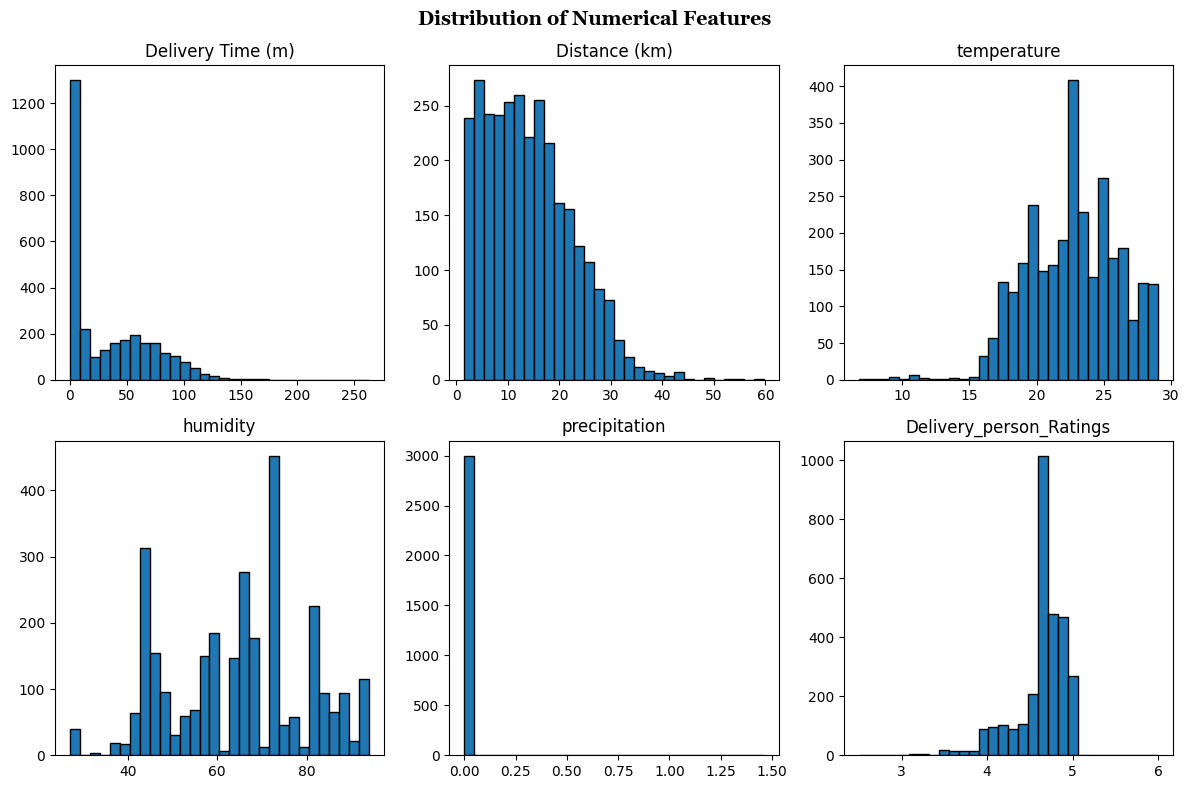

In [154]:
numerical_columns = ['Delivery Time (m)', 'Distance (km)', 'temperature', 'humidity', 'precipitation', 'Delivery_person_Ratings']
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col].dropna(), bins=30, edgecolor='black')
    axes[i].set_title(col)

fig.suptitle("Distribution of Numerical Features", fontfamily='Georgia', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Distribution of Delivery Time

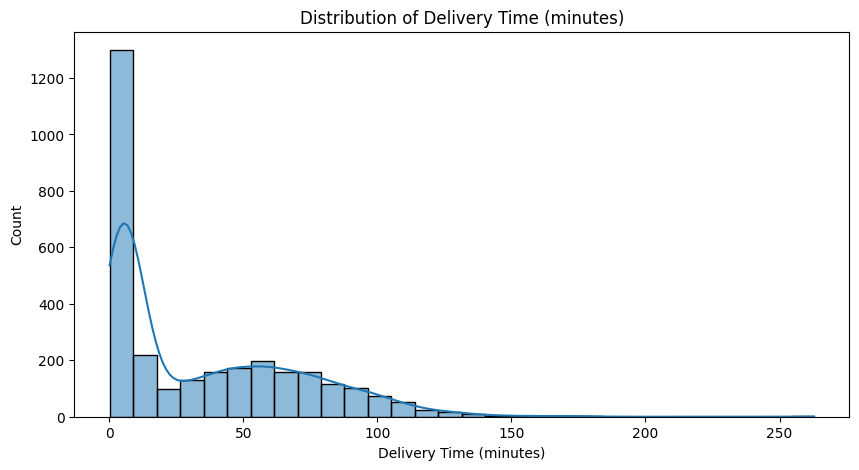

In [155]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Delivery Time (m)'], bins=30, kde=True)
plt.title("Distribution of Delivery Time (minutes)")
plt.xlabel("Delivery Time (minutes)")
plt.show()

## Delivery Time Outliers

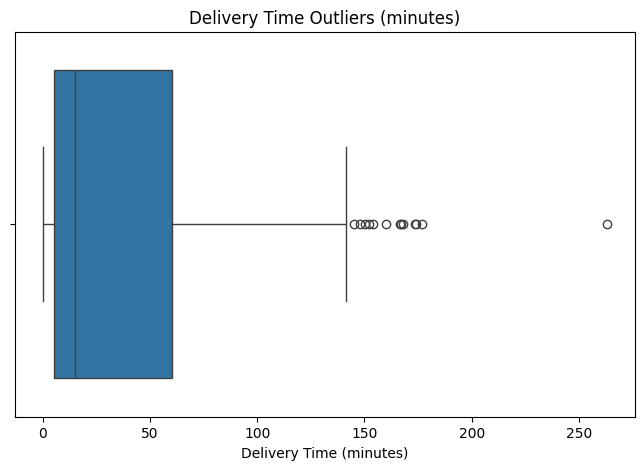

In [156]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Delivery Time (m)'])
plt.title("Delivery Time Outliers (minutes)")
plt.xlabel("Delivery Time (minutes)")
plt.show()

## Number of Deliveries Done during Different Wearher Conditions

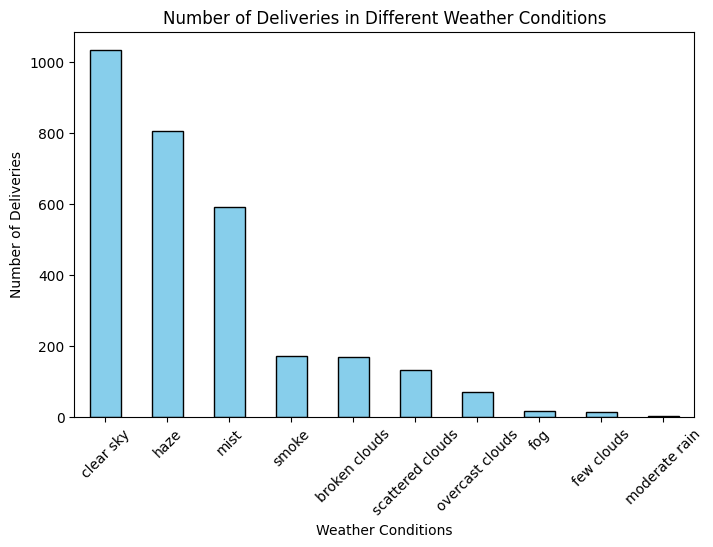

In [157]:
df['Weather'].value_counts().plot(kind='bar', figsize=(8, 5), color='skyblue', edgecolor='black')
plt.title("Number of Deliveries in Different Weather Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Deliveries")
plt.xticks(rotation=45)
plt.show()


## Number of Deliveries Done by Different Ages

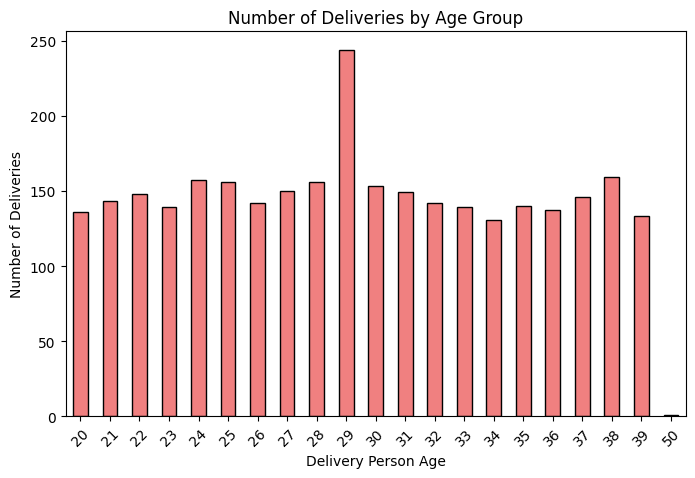

In [158]:
df['Delivery_person_Age'].value_counts().sort_index().plot(kind='bar', figsize=(8, 5), color='lightcoral', edgecolor='black')
plt.title("Number of Deliveries by Age Group")
plt.xlabel("Delivery Person Age")
plt.ylabel("Number of Deliveries")
plt.xticks(rotation=45)
plt.show()


## Correlations of Parameters

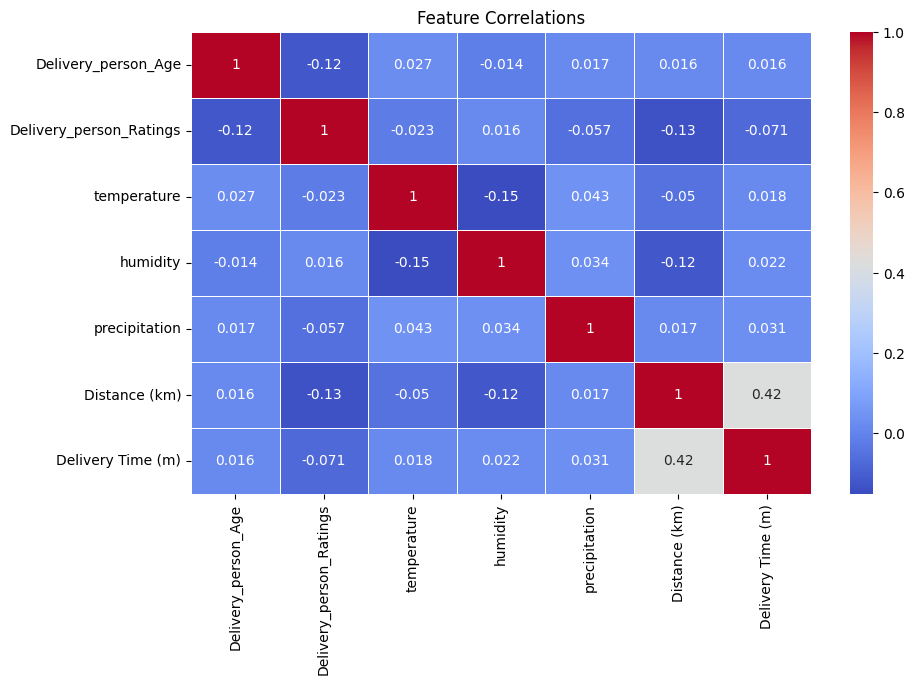

In [159]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlations")
plt.show()

## Deliery Time and Traffic Level

C:\Users\user\AppData\Local\Temp\ipykernel_6664\4031807188.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Traffic_Level'], y=df['Delivery Time (m)'], palette="coolwarm")


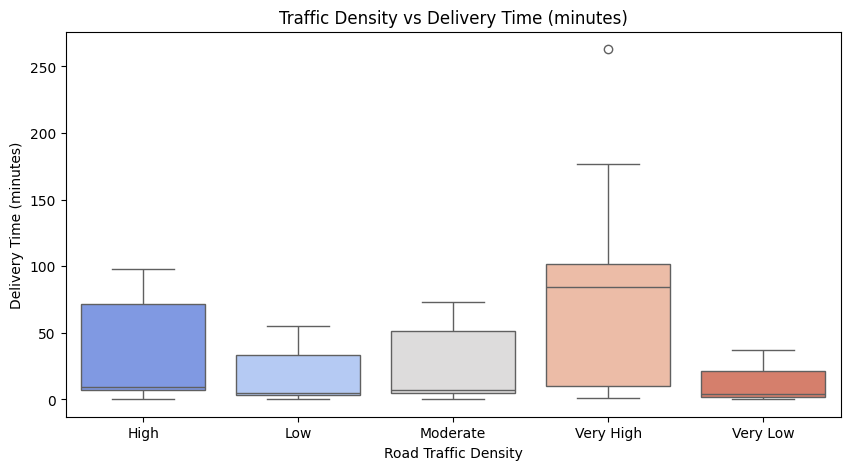

In [160]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Traffic_Level'], y=df['Delivery Time (m)'], palette="coolwarm")
plt.title("Traffic Density vs Delivery Time (minutes)")
plt.xlabel("Road Traffic Density")
plt.ylabel("Delivery Time (minutes)")
plt.show()


## Delivery Time and Distance

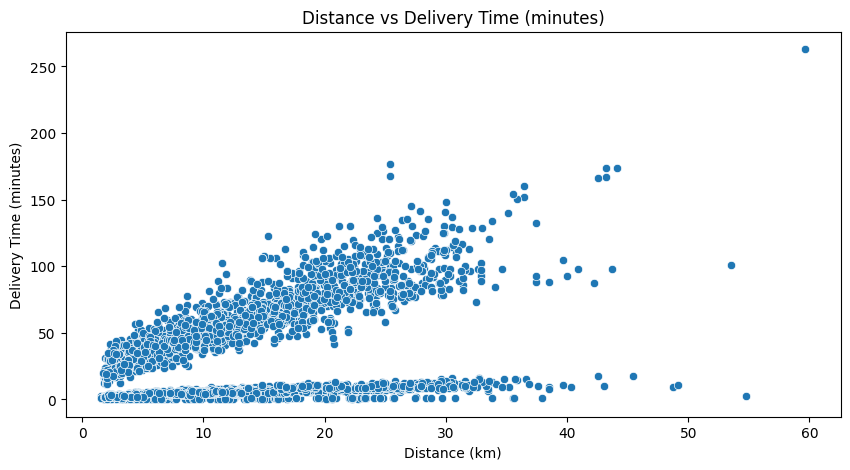

In [161]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Distance (km)'], y=df['Delivery Time (m)'])
plt.title("Distance vs Delivery Time (minutes)")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (minutes)")
plt.show()

##  Delivery Time and Temperature

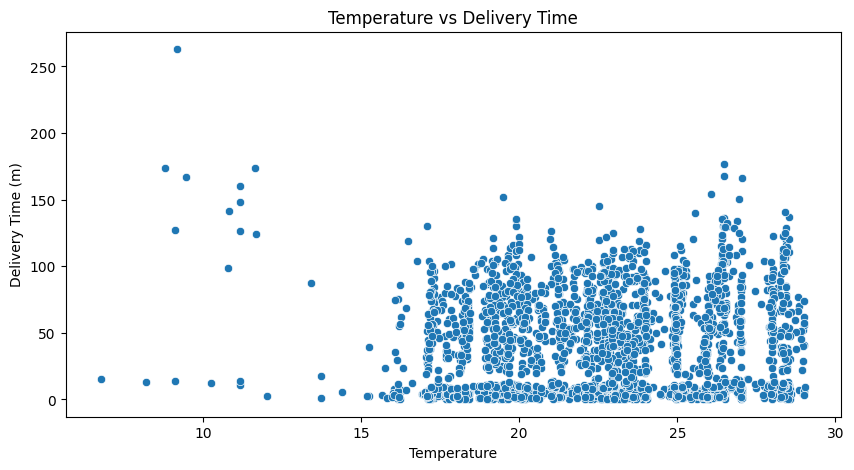

In [162]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['temperature'], y=df['Delivery Time (m)'])
plt.title("Temperature vs Delivery Time")
plt.xlabel("Temperature")
plt.ylabel("Delivery Time (m)")
plt.show()


## Delivery Time and Humidity

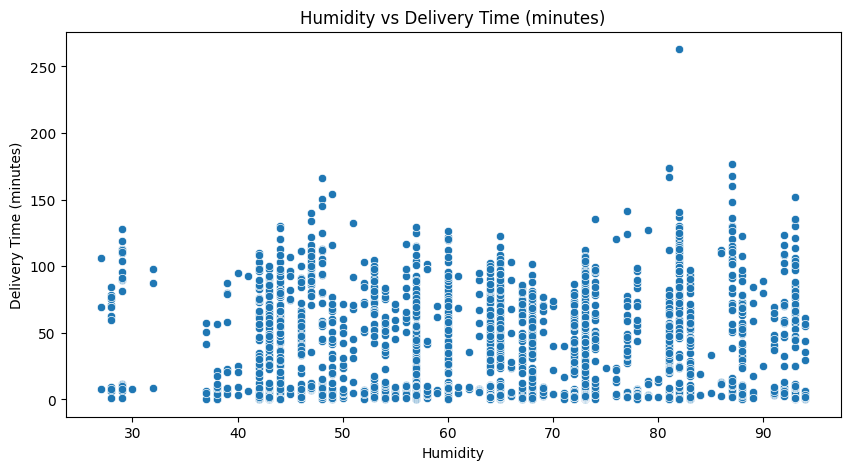

In [163]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['humidity'], y=df['Delivery Time (m)'])
plt.title("Humidity vs Delivery Time (minutes)")
plt.xlabel("Humidity")
plt.ylabel("Delivery Time (minutes)")
plt.show()

## Delivery Time and Precipitation

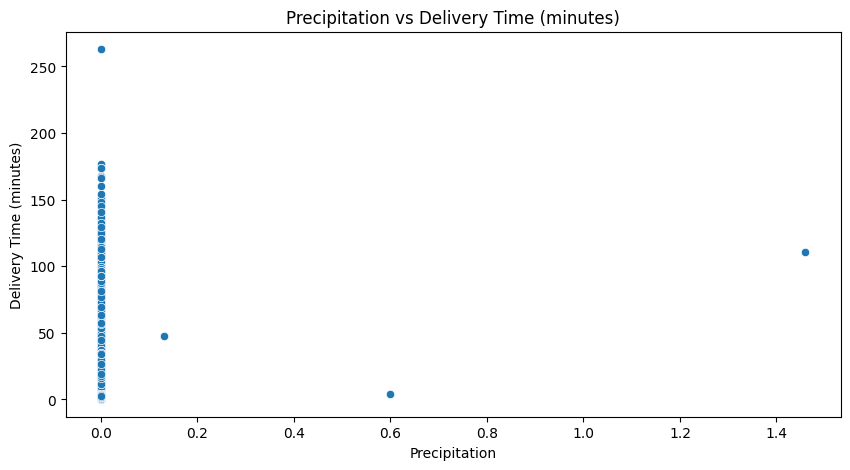

In [164]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['precipitation'], y=df['Delivery Time (m)'])
plt.title("Precipitation vs Delivery Time (minutes)")
plt.xlabel("Precipitation")
plt.ylabel("Delivery Time (minutes)")
plt.show()

## Delivery Time and Delivery Person Ratings

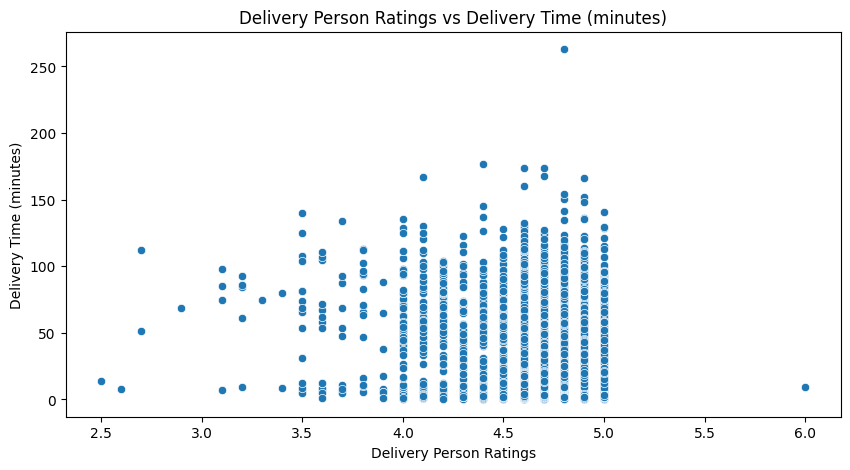

In [165]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Delivery_person_Ratings'], y=df['Delivery Time (m)'])
plt.title("Delivery Person Ratings vs Delivery Time (minutes)")
plt.xlabel("Delivery Person Ratings")
plt.ylabel("Delivery Time (minutes)")
plt.show()

## Delivery Time and Delivery Person Age

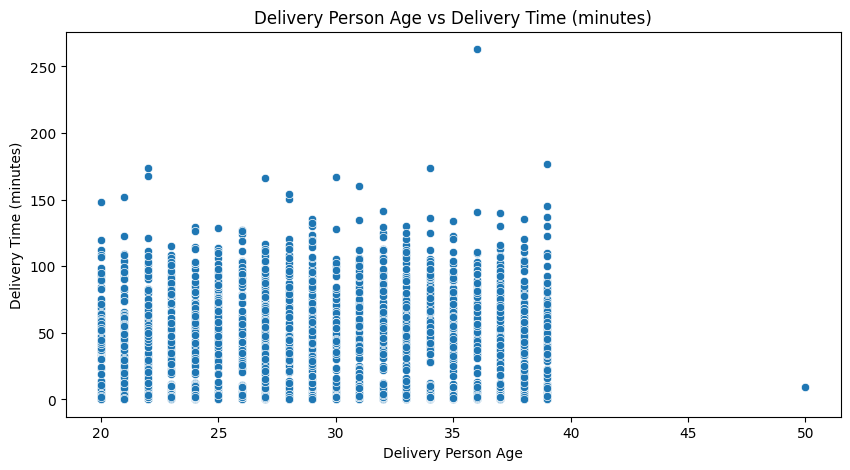

In [166]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Delivery_person_Age'], y=df['Delivery Time (m)'])
plt.title("Delivery Person Age vs Delivery Time (minutes)")
plt.xlabel("Delivery Person Age")
plt.ylabel("Delivery Time (minutes)")
plt.show()